In [101]:
# Import libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
import regex as re
from nltk.corpus import stopwords
from sklearn.feature_extraction import text 

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

## Read in Data

In [102]:
df = pd.read_csv('../data/all_tweets_clean.csv')

In [103]:
df.shape

(4003, 3)

In [104]:
## Convert date column to date type

In [105]:
df['date'] = pd.to_datetime(df['date'])

## EDA

### Remove Stop Words

In [106]:
# from the eda, remove popular wards that are not that significant
common_words = ["feel", "like", "just", "im", "know", "tl", "dr", "tldr", "amp", "nbsp", "really",
               "mom", "mum", "parent", "nparent", "nmom", "dad", "father", "brother", "ex", "nex", 
                "sister", "ns", "mother", "becaus", "because"]

# remove time stop words
time_words = ["time", "today", "tomorrow", "yesterday", 
             "morning", "afternoon", "night",
             "day", "week", "weekend", "month", "year",
              "days", "weeks", "weekends", "months", "years",
             "monday", "tuesday", "wednesday", "thursday", "friday", "satudray", "sunday",
             "mon", "tues", "wed", "thurs", "fri", "sat", "sun"
             "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december",
             "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
            ]


# add the lists together
additional_stop_words = common_words + time_words

### Start with Common Words

In [107]:
# create a count vectorizer for singular words
cvec1 = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(additional_stop_words),  # add my custom stop words to default 'english'
                       min_df=5, 
                       ngram_range=(1,1),
                       max_df=1.0)

In [150]:
# fit and transform my data to count vectorizer
term_mat1 = cvec1.fit_transform(df[df['date'] > '2020-03-15']['text'])

In [151]:
# create a dataframe of my terms
term_df1 = pd.DataFrame(term_mat1.toarray(), columns=cvec1.get_feature_names())

In [110]:
# create a boolean of my date column
# 1 == 'After March 15'
# 0 == "Before March 15"

date = np.where(df['date'] < '2020-03-15', 0, 1)

In [111]:
# insert my date column into term dataframe
term_df1.insert(0, 'before_march_15', date)

In [152]:
# create a dataframe of the top 30 words in each group
top_words = term_df1.mean().T.sort_values(0, ascending=False).head(30)

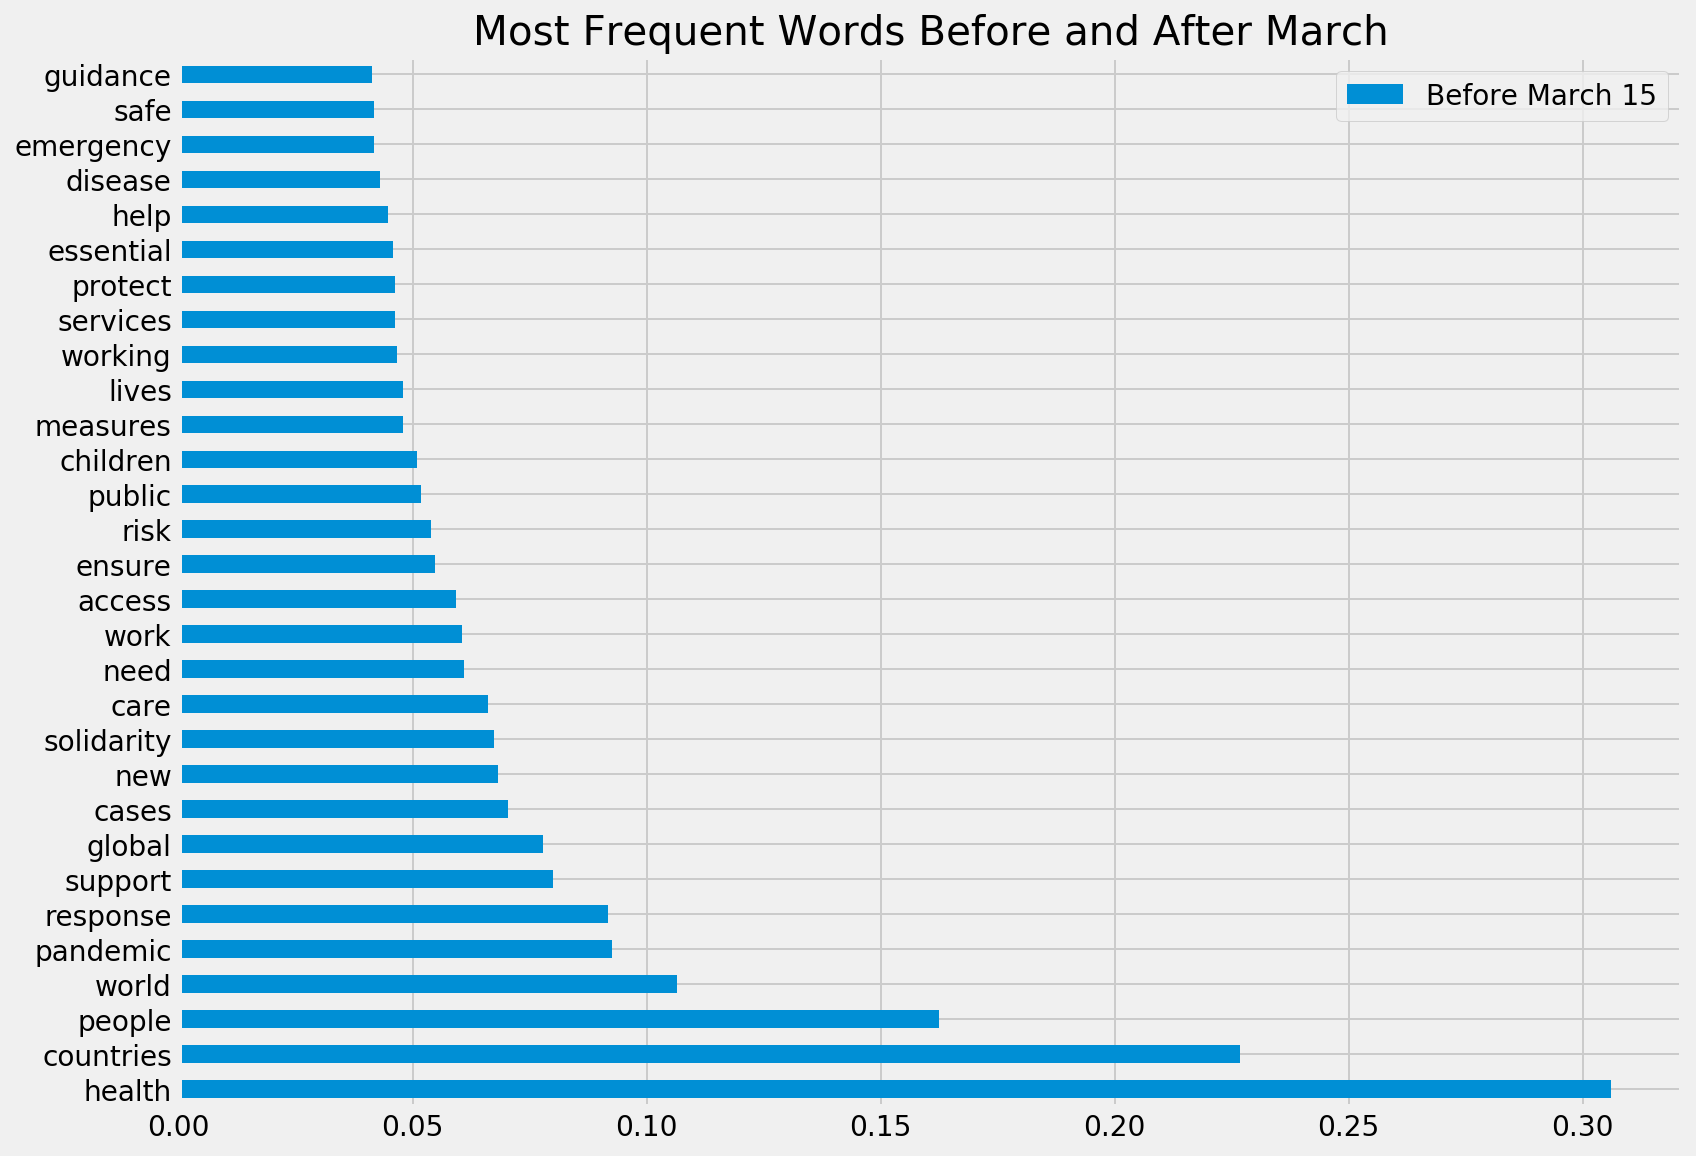

In [153]:
# Visualize the top words between each subreddit
top_words.plot(y=[0, 1], kind="barh", figsize= (12,9))
plt.title("Most Frequent Words Before and After March")
plt.legend(labels=["Before March 15", "After March 15"])
# plt.savefig("../plots/top_words.png");

### Visualize bigrams

In [114]:
# tokenize my words
cvec = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(additional_stop_words), # adds my custom list of stop words to the default english one 
                       min_df=5, 
                       ngram_range=(2,3), # select for bigrams
                       max_df=1.0)

In [116]:
before_march_15 = df[df['date'] < '2020-03-15']

In [118]:
# fit and transform my data into the countvectorizer
term_mat = cvec.fit_transform(before_march_15['text'])

In [119]:
# create into dataframe
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

In [120]:
# insert my class column into my term dataframe
# term_df.insert(0, 'before_march_15', date)

In [127]:
# sort for the top 30 bigrams
top_bigrams = term_df.mean().T.sort_values(0, ascending=False).head(50)

In [142]:
df[df['text'].str.contains('collaboration')].sort_values('date', ascending = False)

,date,text,languages
2183,2020-06-01 15:50:30+00:00,the contribution and generosity towards global...,en
2466,2020-05-22 11:01:56+00:00,in collaboration with the and the we ve devel...,en
2514,2020-05-20 15:28:04+00:00,this includes critical points from the resolu...,en
2537,2020-05-20 08:55:30+00:00,as the leading global health organization who ...,en
2735,2020-05-16 12:16:57+00:00,areas of collaboration between amp who also in...,en
2743,2020-05-16 09:15:21+00:00,this new mou enables us to work together acro...,en
2747,2020-05-16 09:07:57+00:00,thank you president thomas bach dr richard bu...,en
3078,2020-05-01 17:38:04+00:00,close who collaboration will scale up financin...,en
3088,2020-05-01 16:03:41+00:00,the emergency committee provided the following...,en
3096,2020-05-01 15:45:57+00:00,we look forward to seeing how that type of in...,en


In [128]:
top_bigrams

public health                       0.039951
situation report                    0.035034
emergency committee                 0.030117
new ncov                            0.027658
reported cases                      0.026429
novel ncov                          0.023970
confirmed cases                     0.022127
stop transmission                   0.019668
protective equipment                0.018439
cases reported                      0.018439
cases countries                     0.018439
personal protective                 0.017824
prevent spread                      0.017824
personal protective equipment       0.017824
community transmission              0.017210
health care                         0.017210
health regulations                  0.015980
health systems                      0.015980
health emergency                    0.015366
international health                0.015366
nurses midwives                     0.014751
international health regulations    0.014751
save lives

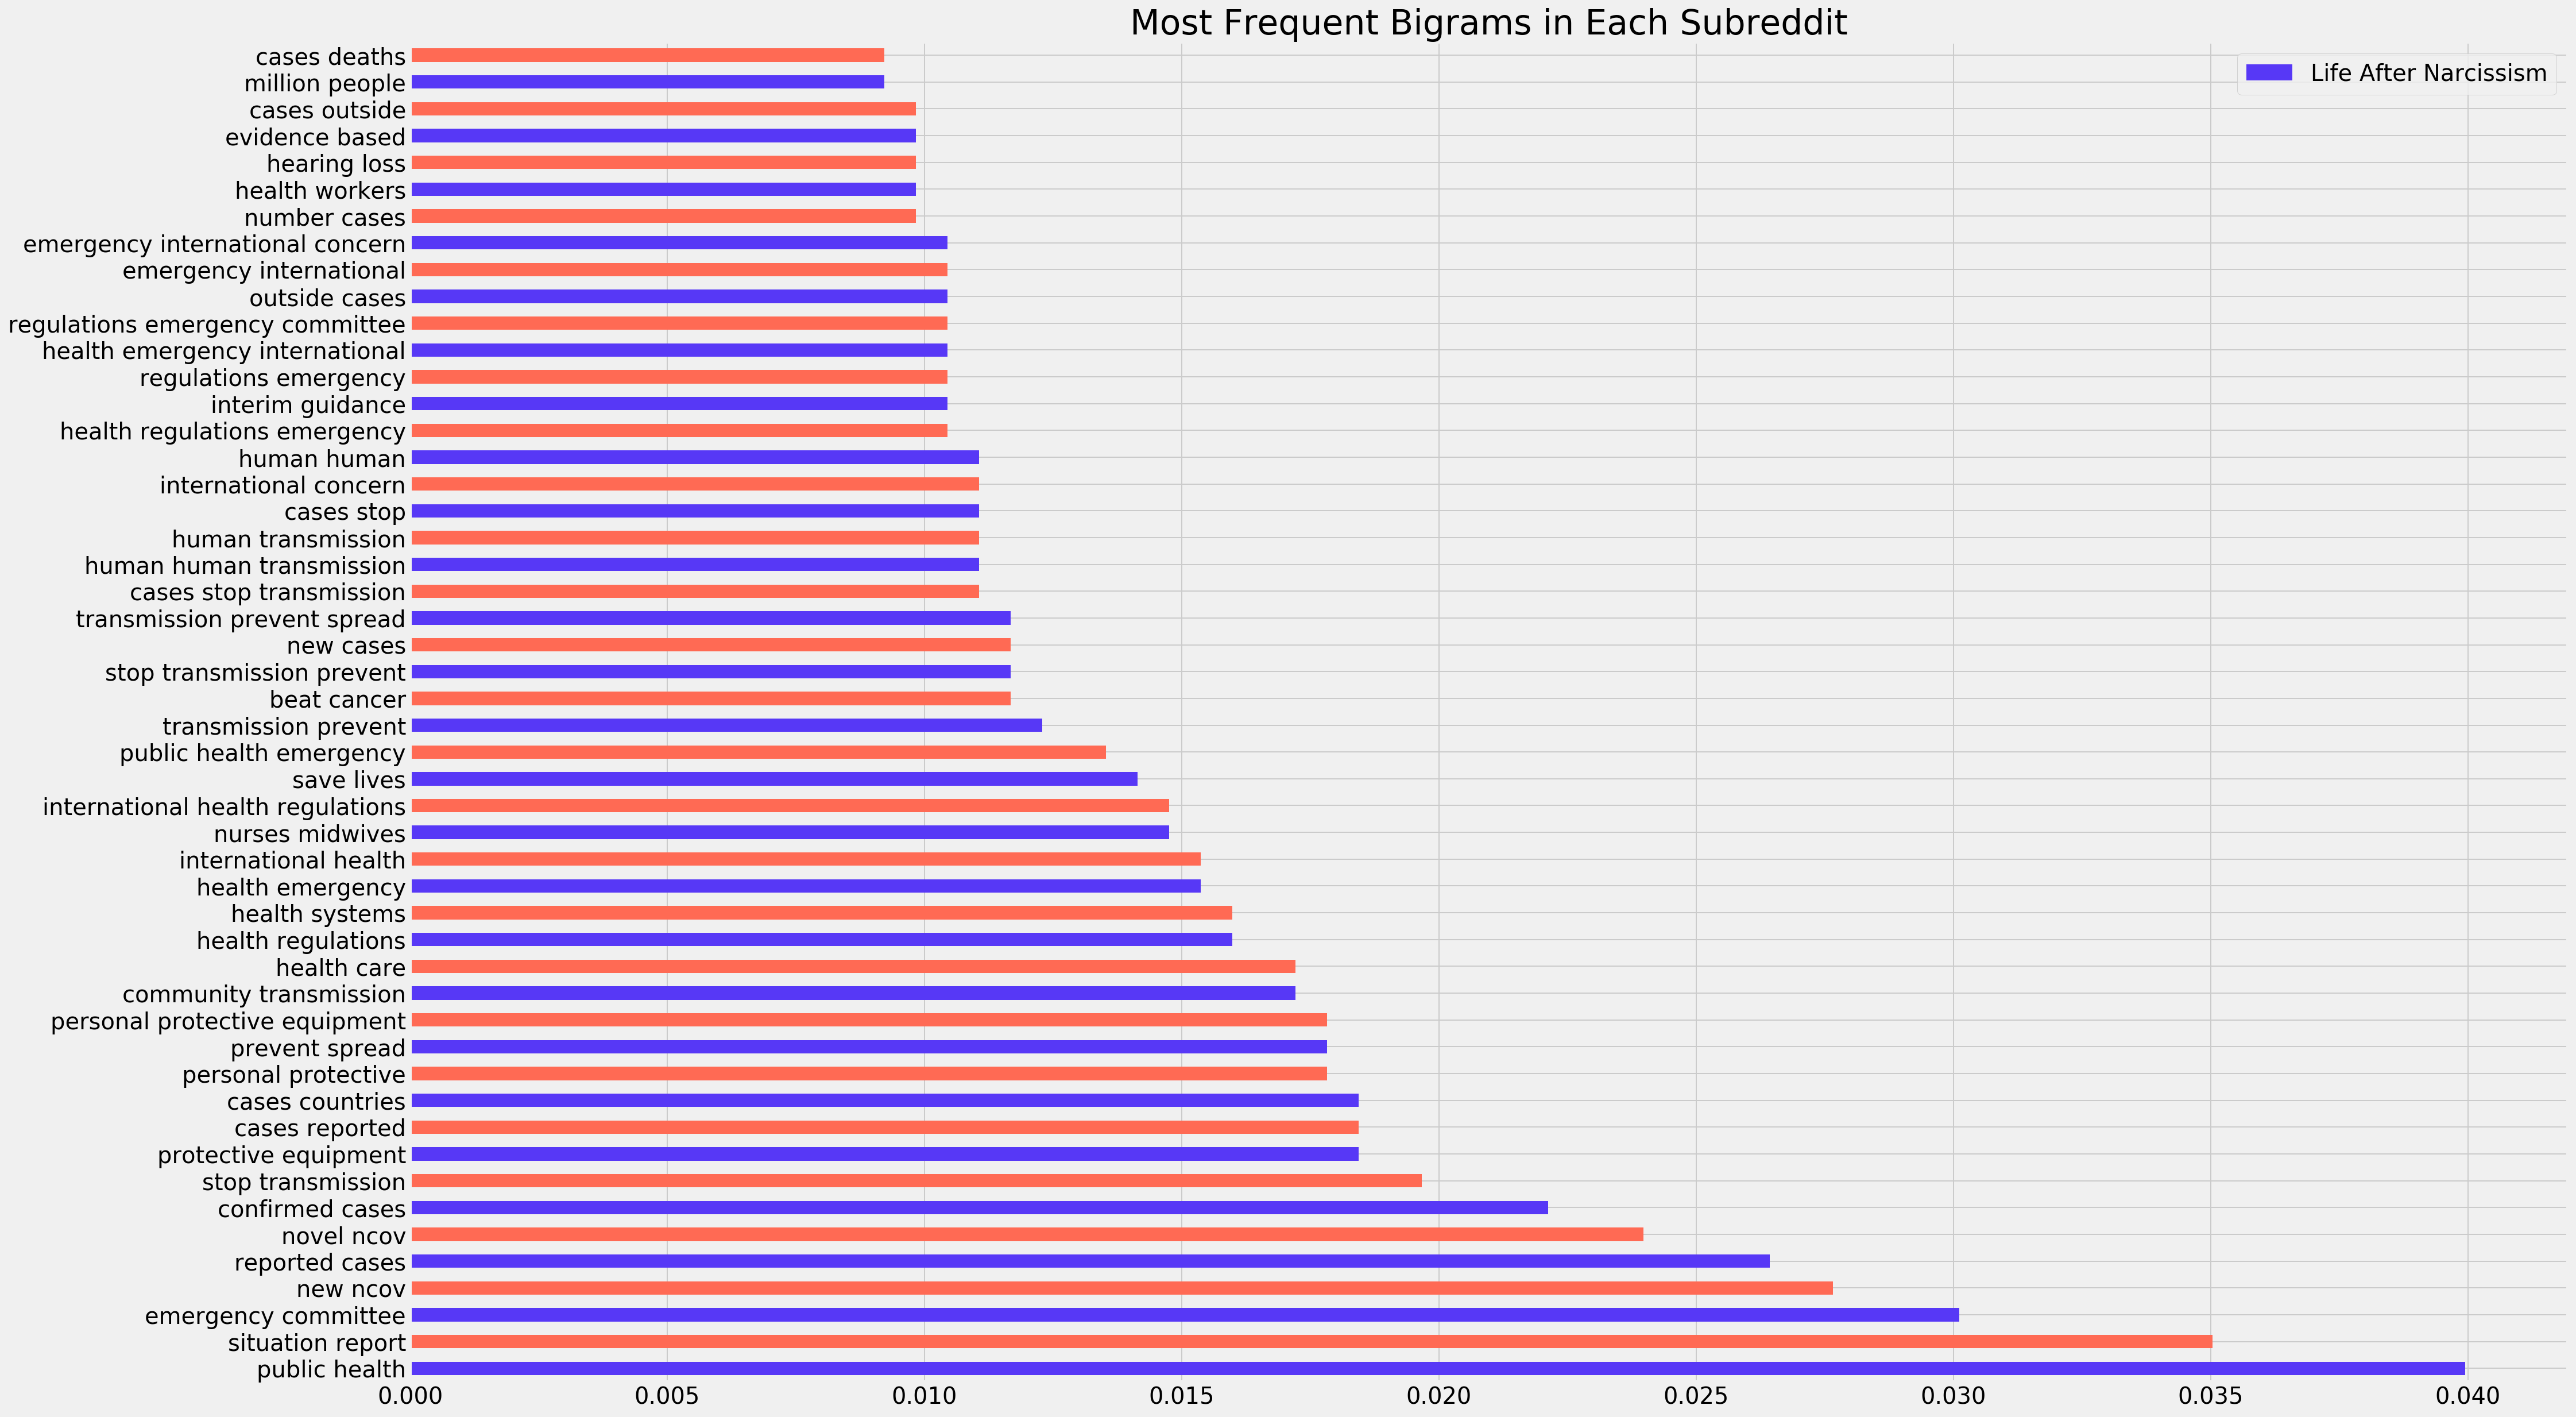

In [156]:
# Visualize the top words between each subreddit
top_bigrams.plot(y=[0, 1], kind="barh", color = ["#5738f6", "#ff6a54"], figsize= (30,20), fontsize=20)
plt.title("Most Frequent Bigrams in Each Subreddit", fontsize=30)
plt.legend(labels=["Life After Narcissism", "Raised By Narcissists"], fontsize =20)
# plt.savefig("../plots/top_bigrams.png");